In [13]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Calcule os autovalores e os autovetores associados da matriz $A = X^t X$

In [87]:
X = np.mat([[1, 2, -1, 3], [2, 4, 1, 1], [1,3, -2, 0],
              [1,4,-1,7], [1,-1,3,3],[1,3,2,1]])

In [90]:
print(X)

[[ 1  2 -1  3]
 [ 2  4  1  1]
 [ 1  3 -2  0]
 [ 1  4 -1  7]
 [ 1 -1  3  3]
 [ 1  3  2  1]]


In [91]:
A = X.T * X
eigenvaluesA, eigenvectorsA = np.linalg.eig(A)
print(A)

[[ 9 19  3 16]
 [19 55 -5 38]
 [ 3 -5 20  2]
 [16 38  2 69]]


In [92]:
print((eigenvaluesA))

[106.78007074   1.04697431  18.02454757  27.14840738]


In [93]:
# Eigenvector corresponding to the first eigenvalue
print(eigenvectorsA[:,0])

[[ 0.24282056]
 [ 0.63088861]
 [-0.01097429]
 [ 0.73681565]]


Quais os valores máximos de $\text( \mathbf{x}^T \mathbf{A} \mathbf{x} ) \text{ e de } ( \mathbf{x}^T \mathbf{C} \mathbf{x} ) \text{ sujeitos à condição }( \mathbf{x}^T \mathbf{x} = 1 )$

In [94]:
# Lembrar de justificar com o teorema
max_eigenvalueA = max(eigenvaluesA)
print(max_eigenvalueA)


106.78007073615613


In [ ]:
# Calcular observações

# calcular produto interno

# calcular norma


- $\text{Calcule os dois primeiros fatores para cada uma das seis observações } (o_1, o_2, \ldots, o_6).\\ \text{ Vamos denotar os vetores bidimensionais } (O_{1}, O_2, \ldots, O_6)\\ \text{ correspondentes aos dois fatores das seis observações.}$


In [95]:

F = np.linalg.norm(eigenvectorsA, axis=1) # para ver se ta normalizado
C = eigenvectorsA[:, [0, -1]] #dois primeiros fatores
Fat = X*C
print(Fat) # vetores bidimensionais


[[ 3.72601903 -0.18520203]
 [ 3.73503691 -1.46614629]
 [ 2.15743497 -3.0206559 ]
 [ 7.93505885  0.80420499]
 [ 1.78945602  3.89096689]
 [ 2.85035345 -0.23193003]]


* Construa um grafo, onde os vértices são os pontos O1, O2, ..., O6 e dois pontos são ligados entre si se um deles é o ponto mais próximo do outro.

In [99]:
def dist_euclidiana(p1, p2):
    return np.sqrt(np.sum(np.asarray(p1 -p2)**2))

In [171]:
num_pontos = Fat.shape[0]
distancias = np.zeros((num_pontos, num_pontos))
for i in range(num_pontos):
    for j in range(num_pontos):
        if i!=j:
            distancias[i, j] = dist_euclidiana(Fat[i], Fat[j])
            #print(distancias[i, j])

vizinhos_mais_proximos = np.argmin(distancias + np.eye(num_pontos) * np.max(distancias), axis=1)

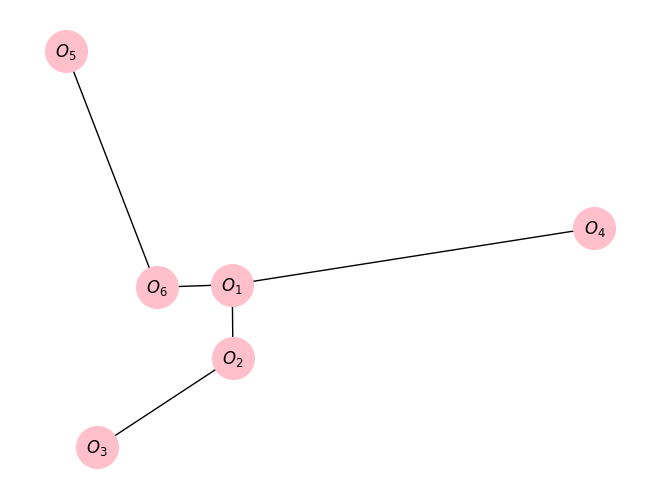

In [187]:
G = nx.Graph()
for i in range(num_pontos):
    G.add_node(i, pos=(Fat[i, 0], Fat[i, 1]))
    nearest = vizinhos_mais_proximos[i]
    G.add_edge(i, nearest)

    # Retrieve node positions
pos = nx.get_node_attributes(G, 'pos')
labels = {i: f'$O_{{{i + 1}}}$'  for i in G.nodes()}

# Plot the graph with original positions
nx.draw(G, pos, labels=labels, with_labels=True, node_color='pink', node_size=900)
plt.show()

* Construa um grafo, onde os vértices são os pontos $o_1, o_2, ..., o_6$ e dois pontos são ligados entre si se um deles é o ponto mais próximo do outro.

Dúvida: como representar $o_i$. Tem a ver com projeção ?

In [226]:
num_pontos = X.shape[0]
num_pontos

6

In [224]:
X.shape

(6, 4)

In [213]:
def dist_euclidiana(p1, p2):
    return np.sqrt(np.sum(np.asarray(p1 -p2)**2))

In [227]:
distancias = np.zeros((num_pontos, num_pontos))
for i in range(num_pontos):
    for j in range(num_pontos):
        if i!=j:
            distancias[i, j] = dist_euclidiana(X[i,:], X[j,:])
vizinhos_mais_proximos = np.argmin(distancias + np.eye(num_pontos) * np.max(distancias), axis=1)

In [228]:
vizinhos_mais_proximos

array([2, 5, 0, 0, 5, 1], dtype=int64)

In [234]:
X[0, 0]

1

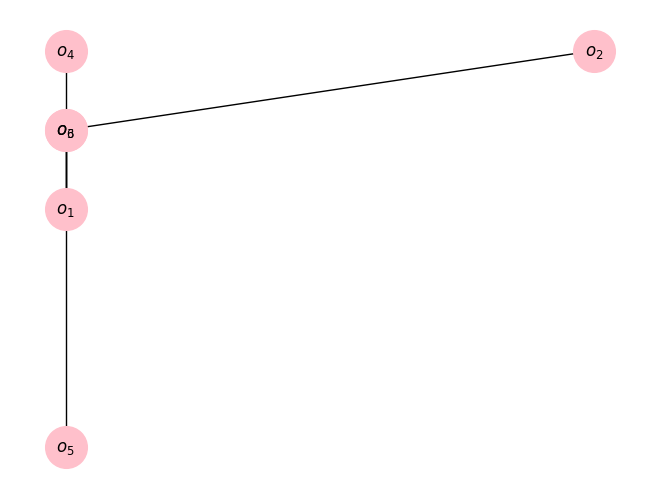

In [233]:

G = nx.Graph()
for i in range(num_pontos):
    G.add_node(i, pos=(X[i, 0], X[i, 1]))
    nearest = vizinhos_mais_proximos[i]
    G.add_edge(i, nearest)

    # Retrieve node positions
pos = nx.get_node_attributes(G, 'pos')
labels = {i: f'$o_{{{i + 1}}}$'  for i in G.nodes()}

# Plot the graph with original positions
nx.draw(G, pos, labels=labels, with_labels=True, node_color='pink', node_size=900)
plt.show()

- Calcule a métrica que envolve a razão entre a soma dos dois primeiros
autovalores de A e a soma de todos os seus autovalores.

- Você acha que valeria a pena calcular um terceiro fator para o problema
de achar os grafos acima, justifique sua resposta.